# Demo Time Series BAGUETTE SALES France

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

* Récupération des données enregistré en ligne sur les ventes de pain dans une boulangerie Française 

In [83]:
trainset=pd.read_csv('Bakery_sales.csv', sep=',').drop(['index','time','ticket_number'],axis=1)
trainset['date']=pd.to_datetime(trainset['date'], )
trainset=trainset.set_index('date')[:-1]
trainset

,article,Quantity,unit_price
date,,,
2021-01-02,BAGUETTE,1.0,"0,90 €"
2021-01-02,PAIN AU CHOCOLAT,3.0,"1,20 €"
2021-01-02,PAIN AU CHOCOLAT,2.0,"1,20 €"
2021-01-02,PAIN,1.0,"1,15 €"
2021-01-02,TRADITIONAL BAGUETTE,5.0,"1,20 €"
...,...,...,...
2022-09-30,TRADITIONAL BAGUETTE,5.0,"1,30 €"
2022-09-30,COUPE,1.0,"0,15 €"
2022-09-30,BOULE 200G,1.0,"1,20 €"


In [131]:
pain = ['BAGUETTE','PAIN','TRADITIONAL BAGUETTE','BANETTE','CAMPAGNE','BOULE 200G','BOULE 400G','SEIGLE','FICELLE','VIK BREAD']
trainbag = trainset.copy()
#SetPain = trainbag[trainbag['article'].isin(pain)].groupby(['date','article']).sum().drop(['unit_price'], axis=1)
#trainbag = trainbag[trainbag['article']=='BAGUETTE'].drop(['article','unit_price'], axis=1)
#.groupby('date').sum()
#trainbag

#trainPain

#trainpain = trainPain.groupby('date').sum()
#trainpain

PainProd = trainset.copy()

PainProd= PainProd[PainProd['article'].isin(pain)].groupby(['date']).sum().drop(['unit_price','article'], axis=1)
#toutProd = toutProd.groupby(['date']).sum()

PainProd


,Quantity
date,
2021-01-02,266.0
2021-01-03,283.0
2021-01-04,203.0
2021-01-05,173.0
2021-01-07,176.0
...,...
2022-09-26,231.0
2022-09-27,227.0
2022-09-28,181.0


In [45]:
testset=trainset.iloc[-49:]
#testset

In [ ]:
trainset=PainProd.iloc[:-49]
trainset

In [132]:
trainset_weekly=PainProd.resample('W').mean()
trainset_monthly=PainProd.resample('M').mean()
trainset_weekly

,Quantity
date,
2021-01-03,274.500000
2021-01-10,189.833333
2021-01-17,176.000000
2021-01-24,172.833333
2021-01-31,169.666667
...,...
2022-09-04,293.666667
2022-09-11,244.714286
2022-09-18,239.428571


<Axes: title={'center': 'monthly'}, xlabel='date'>

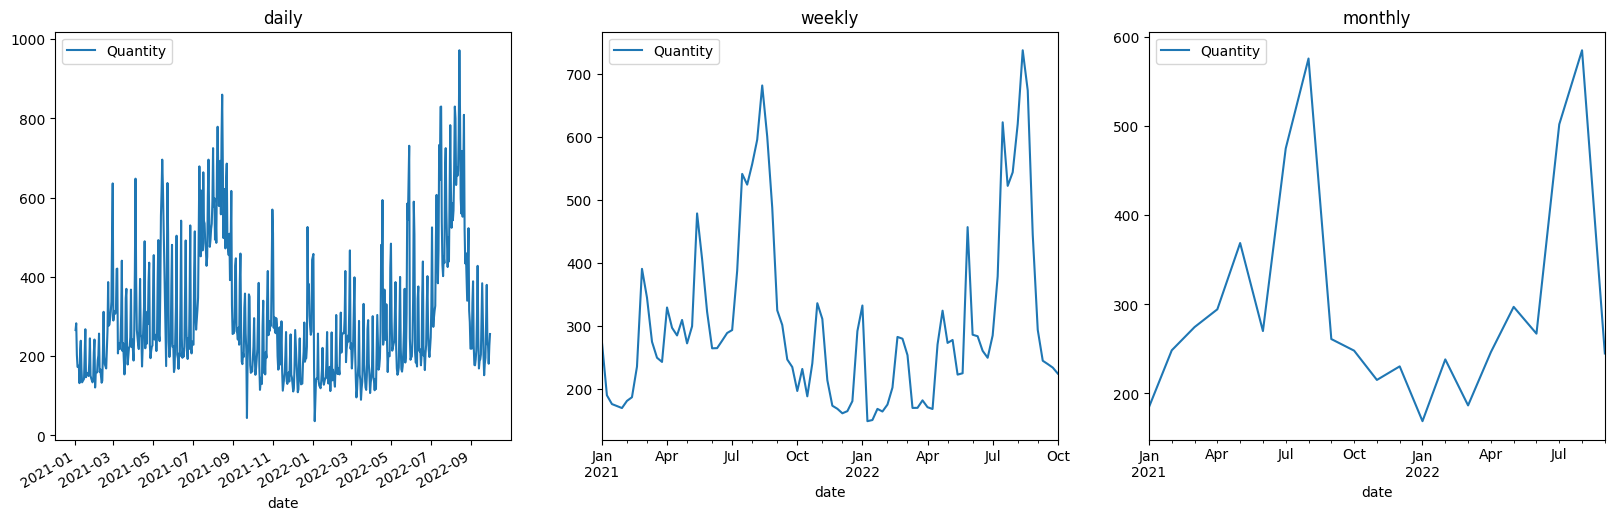

In [133]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(20,6))
PainProd.plot(ax=ax[0],title='daily')
trainset_weekly.plot(ax=ax[1],title='weekly')
trainset_monthly.plot(ax=ax[2],title='monthly')

In [ ]:
trainset_monthly['nm_m']=trainset_monthly.index.map(lambda x: str(x).split('-')[1])
months=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
trainset_monthly['month']=trainset_monthly.nm_m.map(lambda x: months[int(x)-1])
trainset_monthly
#trainset_monthly['day_of_month'] = trainset_monthly.index.day

In [136]:
trainset_weekly


,Quantity
date,
2021-01-03,274.500000
2021-01-10,189.833333
2021-01-17,176.000000
2021-01-24,172.833333
2021-01-31,169.666667
...,...
2022-09-04,293.666667
2022-09-11,244.714286
2022-09-18,239.428571


In [ ]:
PainProd.groupby(["mois","year"]).count()

In [140]:

PainProd['nm_d'] = PainProd.index.weekday + 1
PainProd['day_of_week'] = PainProd.index.strftime('%A')
PainProd

,Quantity,nm_d,day_of_week
date,,,
2021-01-02,266.0,6,Saturday
2021-01-03,283.0,7,Sunday
2021-01-04,203.0,1,Monday
2021-01-05,173.0,2,Tuesday
2021-01-07,176.0,4,Thursday
...,...,...,...
2022-09-26,231.0,1,Monday
2022-09-27,227.0,2,Tuesday
2022-09-28,181.0,3,Wednesday


In [137]:
trainset_weekly['week_number'] = trainset_weekly.index.isocalendar().week
trainset_weekly

,Quantity,week_number
date,,
2021-01-03,274.500000,53
2021-01-10,189.833333,1
2021-01-17,176.000000,2
2021-01-24,172.833333,3
2021-01-31,169.666667,4
...,...,...
2022-09-04,293.666667,35
2022-09-11,244.714286,36
2022-09-18,239.428571,37


In [146]:
BBT=pd.DataFrame(index=range(22),columns=range(4))
for i in range(22):
    BBT.iloc[i,:]=trainset_weekly.iloc[4*i:4*(1+i),:].sort_values('Quantity')['week_number']
BBT

,0,1,2,3
0,3,2,1,53
1,4,5,6,7
2,11,10,9,8
3,12,15,14,13
4,17,18,16,19
5,22,23,21,20
6,24,25,26,27
7,29,28,30,31
8,35,34,33,32
9,39,38,37,36


In [ ]:
week=['monday','tusday','wendesday','thirsday','tuesday','saturday','sunday']
dfm=pd.DataFrame(index=range(90),columns=week)
for i in range(90):
    dfm.iloc[i,:]=PainProd['Quantity'].iloc[12*i:12*(1+i)]
dfm

In [13]:
season_correctedm=dfm.mean()-dfm.mean(axis=0).sum()/len(dfm.mean())
season_correctedm

jan    9.793114
feb    7.720515
mar    1.892218
apr   -1.291693
may   -3.271939
jun   -4.611795
jul   -4.928586
aug   -5.066118
sep   -3.727586
oct   -1.536799
nov    0.589111
dec    4.439557
dtype: object

In [42]:
trainset['no_seasonm']=trainset['Valeur (GW)']
for mon in season_correctedm.index:
    for year in range(5):
        trainset['no_seasonm'].loc[f'{2019+year}-{mon}']=trainset['no_seasonm'].loc[f'{2019+year}-{mon}']-season_correctedm[mon]
trainset

C:\Users\fraga\AppData\Local\Temp\ipykernel_228\1158041900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['no_seasonm']=trainset['Valeur (GW)']
C:\Users\fraga\AppData\Local\Temp\ipykernel_228\1158041900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['no_seasonm'].loc[f'{2019+year}-{mon}']=trainset['no_seasonm'].loc[f'{2019+year}-{mon}']-season_correctedm[mon]


,Valeur (GW),no_season,no_seasonm
Date,,,
2019-01-01,49.71679,43.274914,39.923676
2019-01-02,53.30583,46.863954,43.512716
2019-01-03,53.51208,47.070204,43.718966
2019-01-04,53.57083,47.128954,43.777716
2019-01-05,53.64708,47.205204,43.853966
...,...,...,...
2024-01-27,49.21013,49.210130,49.210130
2024-01-28,48.67601,48.676010,48.676010
2024-01-29,48.15625,48.156250,48.156250


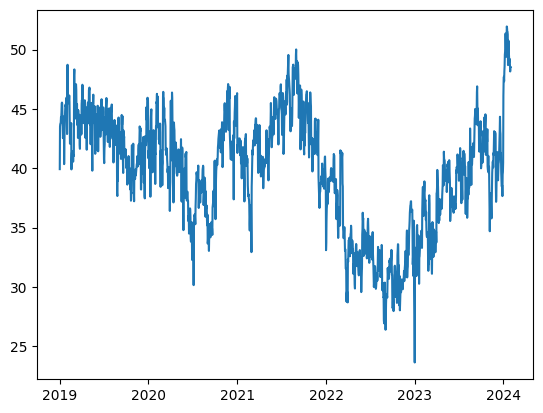

In [43]:
plt.plot(trainset.no_seasonm)

In [11]:
trainset_monthly['nm_q']=trainset_monthly.nm_m.map(lambda x: (int(x)-1)//3+1)
trainset_monthly

,Valeur (GW),nm_m,month,nm_q
Date,,,,
2019-01-31,53.848688,01,jan,1
2019-02-28,51.101573,02,feb,1
2019-03-31,46.612673,03,mar,1
2019-04-30,43.615626,04,apr,2
2019-05-31,40.717661,05,may,2
...,...,...,...,...
2023-09-30,39.899779,09,sep,3
2023-10-31,40.569364,10,oct,4
2023-11-30,40.125158,11,nov,4


In [30]:
trainset_quarterly = trainset.resample('Q').mean()
trainset_quarterly['nm_q']=trainset_monthly.nm_q
trainset_quarterly

,Valeur (GW),no_season,nm_q
Date,,,
2019-03-31,50.501625,88.578155,1.0
2019-06-30,41.184394,-4.428458,2.0
2019-09-30,38.128522,38.128522,3.0
2019-12-31,41.891305,41.891305,4.0
2020-03-31,48.339890,89.156388,1.0
2020-06-30,36.428450,-9.184401,2.0
2020-09-30,32.359476,32.359476,3.0
2020-12-31,44.118731,44.118731,4.0
2021-03-31,47.054895,85.131425,1.0


In [31]:
BBTq=pd.DataFrame(index=range(5),columns=range(5)[1:])
for i in range(5):
    BBTq.iloc[i,:]=trainset_quarterly.iloc[4*i:4*(1+i),:].sort_values('Valeur (GW)')['nm_q']
BBTq

,1,2,3,4
0,3.0,2.0,4.0,1.0
1,3.0,2.0,4.0,1.0
2,2.0,3.0,4.0,1.0
3,3.0,2.0,4.0,1.0
4,2.0,3.0,1.0,4.0


In [32]:
df=pd.DataFrame(index=range(5),columns=range(5)[1:])
for i in range(5):
    df.iloc[i,:]=trainset_quarterly['Valeur (GW)'].iloc[4*i:4*(1+i)]
df

,1,2,3,4
0,50.501625,41.184394,38.128522,41.891305
1,48.33989,36.42845,32.359476,44.118731
2,47.054895,39.67815,41.461607,42.983771
3,43.457736,30.053058,26.604866,32.939384
4,40.696725,35.246731,36.42393,41.812722


In [33]:
season_corrected=df.mean()-df.mean(axis=0).sum()/len(df.mean())
season_corrected

1    6.441876
2   -3.050142
3   -4.572618
4    1.180884
dtype: float64

In [34]:
season_corrected.sum()

0.0

In [35]:
trainset['no_season']=trainset['Valeur (GW)']
for quarter in season_corrected.index:
    for year in range(4):
        trainset['no_season'].loc[f'{2019+year}-{quarter}']=trainset['no_season'].loc[f'{2019+year}-{quarter}']-season_corrected[quarter]
trainset

C:\Users\fraga\AppData\Local\Temp\ipykernel_228\2877742374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['no_season']=trainset['Valeur (GW)']
C:\Users\fraga\AppData\Local\Temp\ipykernel_228\2877742374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['no_season'].loc[f'{2019+year}-{quarter}']=trainset['no_season'].loc[f'{2019+year}-{quarter}']-season_corrected[quarter]


,Valeur (GW),no_season
Date,,
2019-01-01,49.71679,43.274914
2019-01-02,53.30583,46.863954
2019-01-03,53.51208,47.070204
2019-01-04,53.57083,47.128954
2019-01-05,53.64708,47.205204
...,...,...
2024-01-27,49.21013,49.210130
2024-01-28,48.67601,48.676010
2024-01-29,48.15625,48.156250


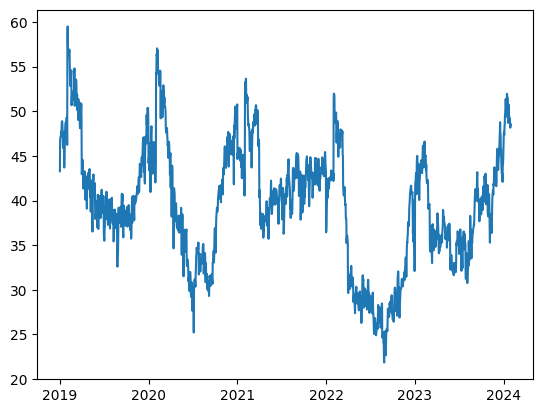

In [36]:
plt.plot(trainset.no_season)

In [44]:
from sklearn.linear_model import LinearRegression
modeleReg=LinearRegression()
modeleReg.fit(np.array(range(len(trainset))).reshape(-1,1),trainset.no_seasonm)

LinearRegression()

In [45]:
coef=modeleReg.coef_
intercept=modeleReg.intercept_
coef, intercept

(array([-0.00341456]), 42.91467924626927)

In [48]:
trend=coef*np.array(range(len(trainset))).reshape(-1,1)+intercept
trend=np.hstack(trend)
trend

array([42.91467925, 42.91126469, 42.90785013, ..., 36.58409015,
       36.58067559, 36.57726104])

In [49]:
trainset['residual']=trainset.no_seasonm-trend
trainset

C:\Users\fraga\AppData\Local\Temp\ipykernel_228\2364312295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset['residual']=trainset.no_seasonm-trend


,Valeur (GW),no_season,no_seasonm,residual
Date,,,,
2019-01-01,49.71679,43.274914,39.923676,-2.991003
2019-01-02,53.30583,46.863954,43.512716,0.601451
2019-01-03,53.51208,47.070204,43.718966,0.811116
2019-01-04,53.57083,47.128954,43.777716,0.873280
2019-01-05,53.64708,47.205204,43.853966,0.952945
...,...,...,...,...
2024-01-27,49.21013,49.210130,49.210130,12.619211
2024-01-28,48.67601,48.676010,48.676010,12.088505
2024-01-29,48.15625,48.156250,48.156250,11.572160


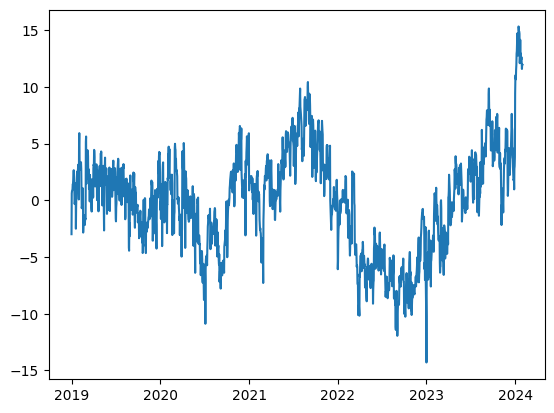

In [50]:
plt.plot(trainset.residual)

In [51]:
trainset.residual.describe()

count    1.857000e+03
mean     3.244697e-15
std      4.503632e+00
min     -1.429683e+01
25%     -3.040663e+00
50%      2.332599e-01
75%      2.812643e+00
max      1.531603e+01
Name: residual, dtype: float64

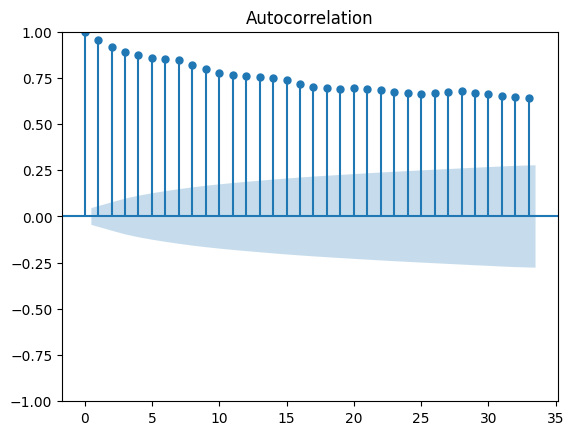

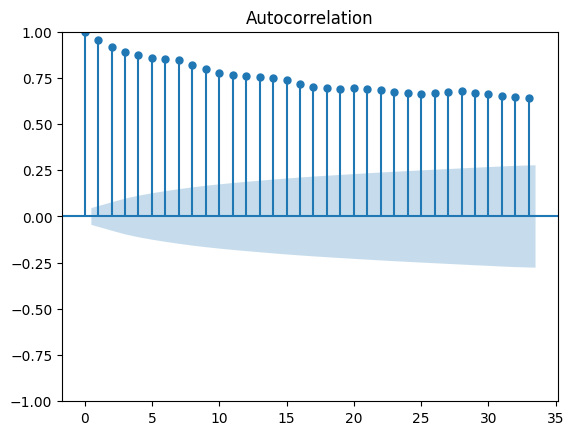

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(trainset.residual)

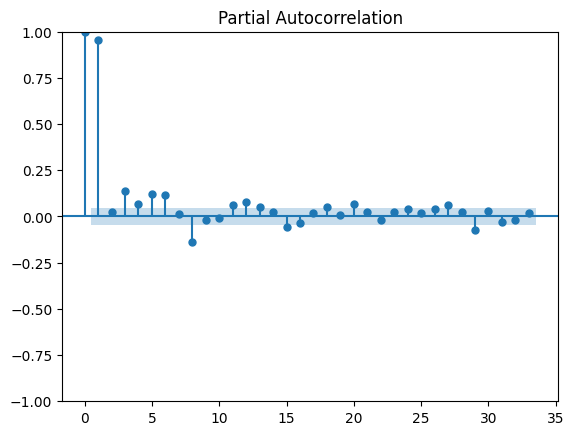

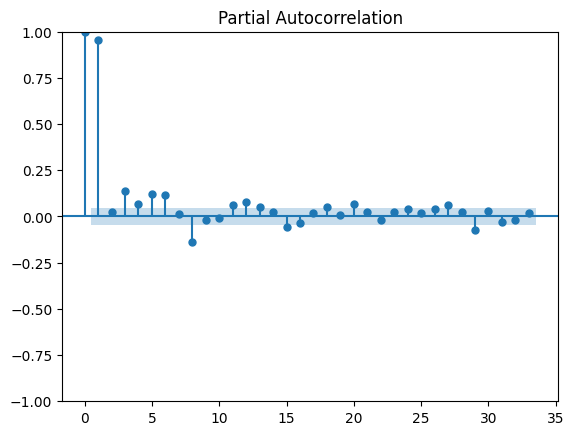

In [54]:
plot_pacf(trainset.residual)

In [55]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(trainset.residual, order=(2,1,7))
res=model.fit()
res.summary()

C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               residual   No. Observations:                 1857
Model:                 ARIMA(2, 1, 7)   Log Likelihood               -3002.066
Date:                Tue, 23 Apr 2024   AIC                           6024.133
Time:                        13:51:07   BIC                           6079.395
Sample:                    01-01-2019   HQIC                          6044.501
                         - 01-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2428      0.003    442.408      0.000       1.237       1.248
ar.L2         -0.9952      0.003   -373.733      0.000      -1.000      -0.990
ma.L1         -1.3770      0.020    -69.560      0.000      -1.416      -1.338
ma.L2          0.9903      0.036     27.631      0.000       0.920       1.061
ma.L3          0.0524      0.042      1.236      0.216      -0.031       0.136
ma.L4         -0.1997      0.044     -4.519      0.000      -0.286      -0.113
ma.L5         -0.0102      0.046     -0.221      0.825      -0.101       0.080
ma.L6          0.0222      0.039      0.571      0.568      -0.054       0.099
ma.L7         -0.0566      0.022     -2.535      0.011      -0.100      -0.013
sigma2         1.4809      0.031     47.755      0.000       1.420       1.542
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1025.49
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(trainset.residual, order=(1,1,6))
model = arima_model.fit()
#print(model.summary())
testset['residual_pred'] = model.forecast(len(testset))
testset

C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fraga\AppData\Local\Temp\ipykernel_228\3634655582.py:5: SettingWithCopyWarning: 
A value

,Valeur (GW),residual_pred
Date,,
2024-02-01,48.94804,12.038323
2024-02-02,49.06049,12.165272
2024-02-03,45.53645,12.175708
2024-02-04,45.02441,12.146854
2024-02-05,46.83975,12.151345
2024-02-06,48.62854,12.144888
2024-02-07,48.45267,12.142644
2024-02-08,48.18729,12.141864
2024-02-09,47.32187,12.141593


In [61]:
testset['residual_pred'].describe()

count    49.000000
mean     12.140949
std       0.016140
min      12.038323
25%      12.141449
50%      12.141449
75%      12.141449
max      12.175708
Name: residual_pred, dtype: float64

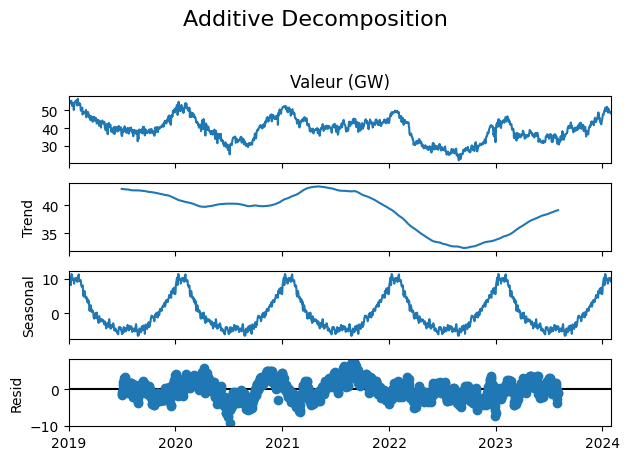

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

additive_decomposition = seasonal_decompose(trainset['Valeur (GW)'], model="additive",period=365)

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()